<div class = "alert alert-block alert-info">
    <b> Przetwarzanie multimediów. Filtracja obrazów </b>
   
FTiMS, semestr letni 2022/2023

Laboratorium 4
</div>

### Zapoznaj się z ...

Przed rozwiązaniem zadania zapoznaj się z https://docs.gimp.org/2.6/en/plug-in-convmatrix.html oraz z wykładem dotyczącym operacji punktowych oraz kontekstowych.

### Uwaga

1. Filtry można definiować na obrazach wektorowych, np. RGB lub obrazach skalarnych (*grayscale*). Dla ułatwienia i skrócenia obliczeń przekonwertuj obraz barwny do postaci macierzy skalarów w następujący sposób:
$$ gray = 0.299R + 0.587G + 0.114B$$
Dzięki takiemu zabiegowi obraz barwny RGB przekształcisz do postaci obrazu, w którym każdy piksel jest skalarem. Filtracja obrazów wektorowych jest bardziej złożona niż zwykłe iterowanie po poszczególnych składowych.

Filtr usredniajacy: np. 1/9 * maska[[1,1,1][1,1,1],[1,1,1]] (9x9, wspolczynniki rowne 1)

# Zadanie

Zaimplementuj 
1. (**0.5 punktu**) filtr prosty uśredniający  
2. (**0.5 punktu**) filtr medianowy

dla dwóch różnych rozmiarów masek przekształcenia (jąder filtrów), np. $3 \times 3 $   oraz $11 \times 11$, niezależnie dla obu filtrów. W ramach rozwiązania przedstaw kod oraz wyświetl obraz oryginalny i wyniki obrazów po filtracji (2 obrazy dla filtra uśredniającego oraz 2 obrazy dla filtra medianowego).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
%matplotlib inline

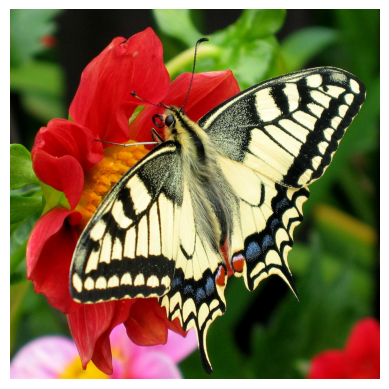

In [2]:
img = plt.imread('butterfly.jpg')
plt.axis('off')
plt.imshow(img)

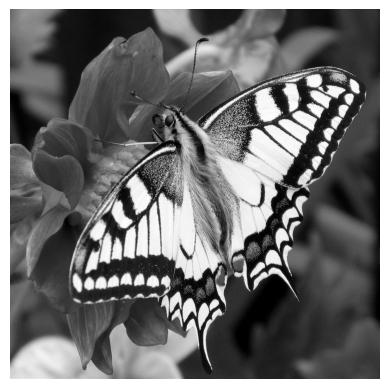

In [3]:
img = 0.299 * img[:,:,0] + 0.587 *img[:,:,1] + 0.114*img[:,:,2]
plt.axis('off')
plt.imshow(img, cmap = 'gray')

(-0.5, 930.5, 930.5, -0.5)

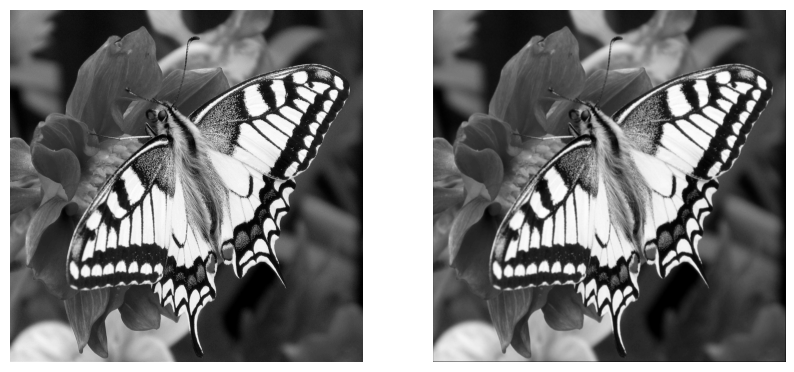

In [16]:
img_avg_3x3 = copy.deepcopy(img)
for w in range(np.shape(img_avg_3x3)[0]):
    for k in range(np.shape(img_avg_3x3)[1]):
        try:
            sum = 0
            for i in range(3):
                for j in range(3):
                    sum += img[w+1-i,k+1-j]
            img_avg_3x3[w,k] = np.uint8(1/(3**2) * sum)
        except:
            img_avg_3x3[w,k] = 0

plt.figure(figsize=(10,10))
plt.subplot(1,2,1);
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(img_avg_3x3, cmap='gray')
plt.axis('off')

(-0.5, 930.5, 930.5, -0.5)

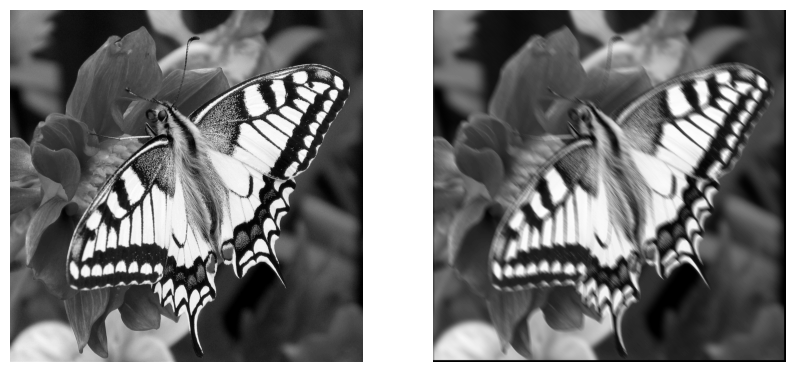

In [17]:
img_avg_11x11 = copy.deepcopy(img)
for w in range(np.shape(img_avg_11x11)[0]):
    for k in range(np.shape(img_avg_11x11)[1]):
        try:
            sum = 0
            for i in range(11):
                for j in range(11):
                    sum += img[w+5-i,k+5-i]
            img_avg_11x11[w,k] = np.uint8(1/(11**2) * sum)
        except:
            img_avg_11x11[w,k] = 0
        
plt.figure(figsize=(10,10))
plt.subplot(1,2,1);
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(img_avg_11x11, cmap='gray')
plt.axis('off')

(-0.5, 930.5, 930.5, -0.5)

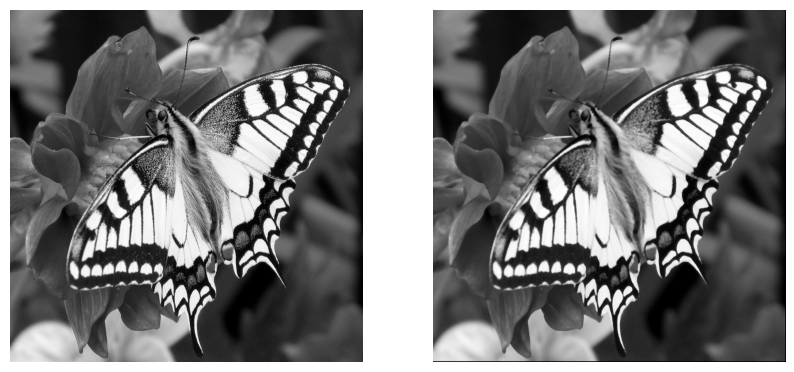

In [18]:
img_med_5x5 = copy.deepcopy(img)
for w in range(np.shape(img_med_5x5)[0]):
    for k in range(np.shape(img_med_5x5)[1]):
        try:
            sample = []
            for i in range(5):
                for j in range(5):
                    sample.append(img[w+2-i,k+2-j])
            img_med_5x5[w,k] = np.uint8(np.median(sample))
        except:
            img_med_5x5[w,k] = 0
        
plt.figure(figsize=(10,10))
plt.subplot(1,2,1);
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(img_med_5x5, cmap='gray')
plt.axis('off')

(-0.5, 930.5, 930.5, -0.5)

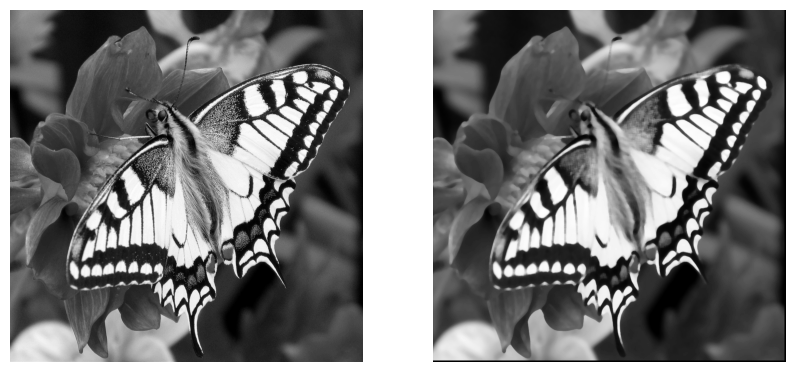

In [19]:
img_med_9x9 = copy.deepcopy(img)
for w in range(np.shape(img_med_9x9)[0]):
    for k in range(np.shape(img_med_9x9)[1]):
        try:
            sample = []
            for i in range(9):
                for j in range(9):
                    sample.append(img[w+4-i,k+4-j])
            img_med_9x9[w,k] = np.uint8(np.median(sample))
        except:
            img_med_9x9[w,k] = 0
        
plt.figure(figsize=(10,10))
plt.subplot(1,2,1);
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(img_med_9x9, cmap='gray')
plt.axis('off')